In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
bat=pd.read_csv('batting.csv')
bat.head()

,Player,Team1,Team2,Runs,Balls,4s,6s,Ducks,SR,Dream11_score
0,Devon Conway,CSK,KKR,3,8,0,0,0,37.50,7
1,Robin Uthappa,CSK,KKR,28,21,2,2,0,133.33,40
2,Ambati Rayudu,CSK,KKR,15,17,1,1,0,88.24,22
3,Ravindra Jadeja,CSK,KKR,26,28,0,1,0,92.86,32
4,Shivam Dube,CSK,KKR,3,6,0,0,0,50.00,7


In [6]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1036 non-null   object 
 1   Team1          1036 non-null   object 
 2   Team2          1036 non-null   object 
 3   Runs           1036 non-null   int64  
 4   Balls          1036 non-null   int64  
 5   4s             1036 non-null   int64  
 6   6s             1036 non-null   int64  
 7   Ducks          1036 non-null   int64  
 8   SR             1036 non-null   float64
 9   Dream11_score  1036 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 81.1+ KB


In [7]:
bat.isnull().sum()

Player           0
Team1            0
Team2            0
Runs             0
Balls            0
4s               0
6s               0
Ducks            0
SR               0
Dream11_score    0
dtype: int64

In [8]:
bat.describe()

,Runs,Balls,4s,6s,Ducks,SR,Dream11_score
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.0,1036.000000,1036.000000
mean,22.250965,16.407336,1.946911,1.025097,0.0,127.971197,32.964286
std,21.587408,13.316080,2.297674,1.470925,0.0,65.107302,30.242717
min,1.000000,1.000000,0.000000,0.000000,0.0,14.290000,0.000000
25%,6.000000,6.000000,0.000000,0.000000,0.0,85.710000,10.000000
50%,15.000000,13.000000,1.000000,0.000000,0.0,123.530000,21.000000
75%,33.000000,24.000000,3.000000,2.000000,0.0,162.500000,49.000000
max,140.000000,70.000000,13.000000,10.000000,0.0,600.000000,196.000000


<Axes: xlabel='Player', ylabel='count'>

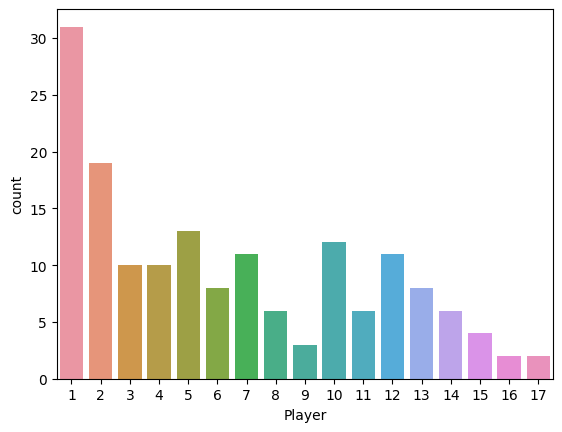

In [9]:
sns.countplot(x=bat.Player.value_counts(),data=bat)

In [10]:
player_stats=bat[['Player','Runs','Balls','4s','6s','Ducks','SR','Dream11_score']].groupby('Player').sum().sort_values("Runs",ascending=False)

In [11]:
highest_runs=bat['Runs'].argmax()
bat.iloc[highest_runs]

Player           Quinton De Kock
Team1                        LSG
Team2                         MI
Runs                         140
Balls                         70
4s                            10
6s                            10
Ducks                          0
SR                         200.0
Dream11_score                196
Name: 921, dtype: object

In [12]:
highest_score=bat['Dream11_score'].argmax()
bat.iloc[highest_score]

Player           Quinton De Kock
Team1                        LSG
Team2                         MI
Runs                         140
Balls                         70
4s                            10
6s                            10
Ducks                          0
SR                         200.0
Dream11_score                196
Name: 921, dtype: object

In [13]:
player_stats

,Runs,Balls,4s,6s,Ducks,SR,Dream11_score
Player,,,,,,,
Jos Buttler,863,579,83,45,0,2188.73,1246
K L Rahul,616,453,45,30,0,1426.35,851
Quinton De Kock,508,341,47,23,0,1860.95,739
Hardik Pandya,487,371,49,12,0,1812.83,686
Shubman Gill,483,361,51,11,0,1683.55,672
...,...,...,...,...,...,...,...
Jagadeesha Suchith,2,7,0,0,0,28.57,6
Tim Southee,2,6,0,0,0,120.00,10
Harshit Rana,2,1,0,0,0,200.00,6


In [14]:
player_team=bat[['Player','Team1']].groupby('Player').sample()
player_team.set_index("Player",inplace=True)
player_team
player_team.loc['Jos Buttler']

Team1    RR
Name: Jos Buttler, dtype: object

In [15]:
player_stats=player_stats.merge(player_team,on='Player')
player_stats

,Runs,Balls,4s,6s,Ducks,SR,Dream11_score,Team1
Player,,,,,,,,
Jos Buttler,863,579,83,45,0,2188.73,1246,RR
K L Rahul,616,453,45,30,0,1426.35,851,LSG
Quinton De Kock,508,341,47,23,0,1860.95,739,LSG
Hardik Pandya,487,371,49,12,0,1812.83,686,GT
Shubman Gill,483,361,51,11,0,1683.55,672,GT
...,...,...,...,...,...,...,...,...
Jagadeesha Suchith,2,7,0,0,0,28.57,6,SRH
Tim Southee,2,6,0,0,0,120.00,10,KKR
Harshit Rana,2,1,0,0,0,200.00,6,KKR


<Axes: xlabel='Team1', ylabel='count'>

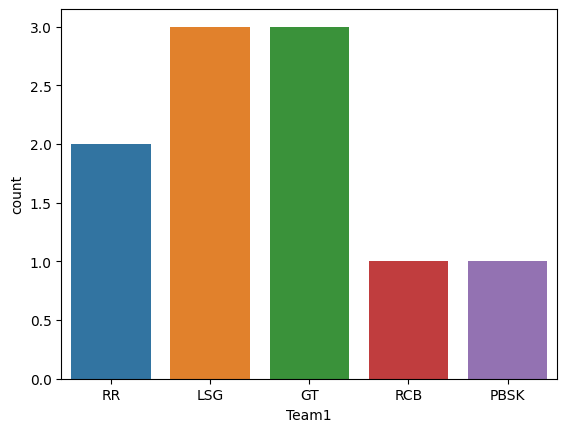

In [16]:
sns.countplot(x=player_stats.head(10).Team1)

In [17]:
player_stats.loc['Virat Kohli']

Runs                 341
Balls                291
4s                    32
6s                     8
Ducks                  0
SR               1408.57
Dream11_score        477
Team1                RCB
Name: Virat Kohli, dtype: object

In [18]:
team_stats=player_stats.groupby('Team1').sum().sort_values('Runs',ascending=False)
team_stats

,Runs,Balls,4s,6s,Ducks,SR,Dream11_score
Team1,,,,,,,
RR,2807,2031,249,137,0,15329.40,4200
GT,2517,1885,250,79,0,12564.83,3637
RCB,2454,1849,222,102,0,14216.40,3598
LSG,2405,1747,188,115,0,13523.17,3539
DC,2218,1569,205,106,0,12536.83,3329
PBSK,2193,1599,200,110,0,14604.01,3305
CSK,2165,1630,183,103,0,11471.91,3200
KKR,2109,1537,177,113,0,13641.59,3166
MI,2100,1602,173,100,0,13162.13,3085


In [19]:
#Label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [20]:
categorical_features=bat[['Player','Team1','Team2']]

In [21]:
for column in categorical_features:
    bat[column]=label_encoder.fit_transform(bat[column])
bat.head()

,Player,Team1,Team2,Runs,Balls,4s,6s,Ducks,SR,Dream11_score
0,29,0,3,3,8,0,0,0,37.50,7
1,115,0,3,28,21,2,2,0,133.33,40
2,9,0,3,15,17,1,1,0,88.24,22
3,109,0,3,26,28,0,1,0,92.86,32
4,133,0,3,3,6,0,0,0,50.00,7


In [29]:
#splitting dependant and independant variables
x=bat.drop('Dream11_score',axis=1)
x

,Player,Team1,Team2,Runs,Balls,4s,6s,Ducks,SR
0,29,0,3,3,8,0,0,0,37.50
1,115,0,3,28,21,2,2,0,133.33
2,9,0,3,15,17,1,1,0,88.24
3,109,0,3,26,28,0,1,0,92.86
4,133,0,3,3,6,0,0,0,50.00
...,...,...,...,...,...,...,...,...,...
1031,159,2,8,5,7,1,0,0,71.43
1032,137,2,8,45,43,3,1,0,104.65
1033,76,2,8,8,10,0,1,0,80.00
1034,40,2,8,34,30,3,1,0,113.33


In [30]:
y=bat['Dream11_score']
y

0        7
1       40
2       22
3       32
4        7
        ..
1031    10
1032    58
1033    14
1034    47
1035    49
Name: Dream11_score, Length: 1036, dtype: int64